<a href="https://colab.research.google.com/github/amandafriedmann/NEUR-Data-Analysis/blob/main/02_27_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cell Types Plotting

This notebook will build on our previous Cell Types notebook to help us (*finally!*) plot the data that we've pulled from the Allen Cell Types database.

### By the end of this notebook, you'll be able to:

* Create plots using `matplotlib.pyplot`
* Manipulate aspects of plots
* Create bar, box, and scatter plots from the Allen Cell Types metrics


## Step One: Get comfortable with our plotting tools

First, let's get set up for plotting by importing the necessary tool boxes.

In [1]:
# Tell Jupyter to plot our plots inline
%matplotlib inline

# Import matplotlib and "pyplot" module
# plt is the common abbreviation for matplotlib's pyplot module
import matplotlib as mpl
import matplotlib.pyplot as plt

First, let's create a random line using our favorite scientific computing toolbox, and show how we can use the `matplotlib.pyplot` module to plot it.

Useful functions:

* `plt.plot()` create a plot from a list, array, pandas series, etc.
* `plt.show()` show the plot (not strictly necessary in Jupyter, necessary in other IDEs)
* `plt.xlabel()` and `plt.ylabel()` change x and y labels
* `plt.title()` add a title

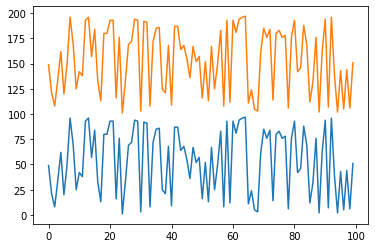

In [2]:
import numpy as np

# Generate a random line from 1 to 100 with 100 values
random_line = np.random.randint(1,100,100)
random_line

random_line_2 = random_line + 100

plt.plot(random_line)
plt.plot(random_line_2)
plt.show()

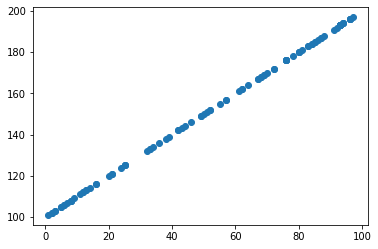

In [3]:
# Create a scatter plot to show the relationship between the two lines

plt.scatter(random_line,random_line_2)
plt.show()


The `plt.hist()` function works really similarly.

><b>Task:</b> In the cell below:
1. Generate a random list of 100 data points from a standard normal distribution (Hint: Use <code>np.random.standard_normal()</code>)
2. Plot a histogram of the data.

(array([ 2.,  2.,  9., 17., 20., 16., 15., 11.,  5.,  3.]),
 array([-2.78307451, -2.25012538, -1.71717626, -1.18422713, -0.651278  ,
        -0.11832887,  0.41462026,  0.94756938,  1.48051851,  2.01346764,
         2.54641677]),
 <BarContainer object of 10 artists>)

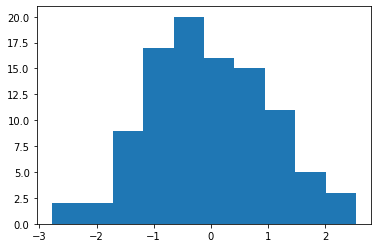

In [13]:
# Your code here
rando_list = np.random.standard_normal(100)
plt.hist(rando_list)

We can also set up multiple subplots on the same figure using `subplots`. This also creates separate **axes** (really, separate plots) which we can access and manipulate, particularly if you are plotting multiple lines. It's common to use the `subplots` command for easier access to axis attributes.

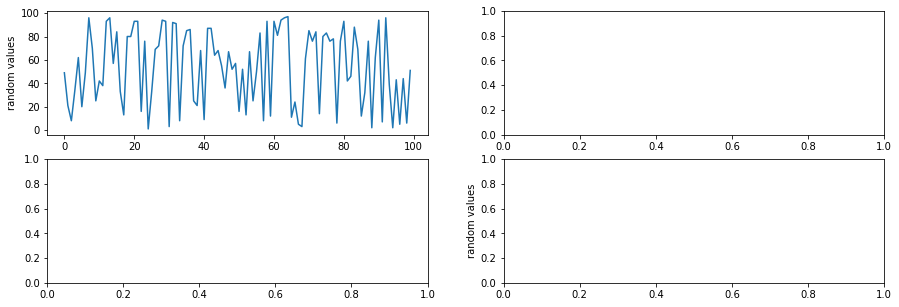

In [14]:
fig, ax = plt.subplots(2,2,figsize=(15,5))
ax[0,0].plot(random_line)
ax[0,0].set_ylabel('random values')

plt.ylabel('random values')
plt.show()

><b>Task:</b> Plot your second <code>random_line_2</code> in the upper-right hand subplot, put a scatter plot with <code>random_line</code> on the x-axis and <code>random_line_2</code> on the y-axis in the lower-left hand subplot, and put a histogram of your normally-distributed random data in the lower-right hand subplot.

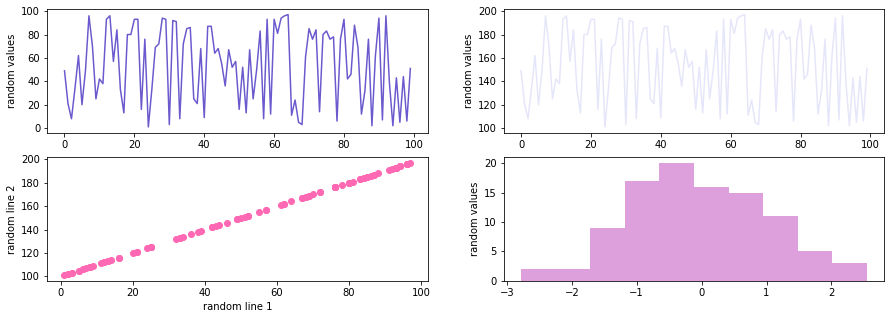

In [32]:
# Your code here
fig, ax = plt.subplots(2,2,figsize=(15,5))
ax[0,0].plot(random_line, color = "slateblue")
ax[0,0].set_ylabel('random values')
ax[0,1].plot(random_line_2, color = "lavender")
ax[0,1].set_ylabel('random values')
ax[1,0].scatter(random_line,random_line_2, color = "hotpink")
ax[1,0].set_xlabel('random line 1')
ax[1,0].set_ylabel('random line 2')
ax[1,1].hist(rando_list, color = "plum")



plt.ylabel('random values')
plt.show()


There are *many, many* different aspects of a figure that you could manipulate (and spend a lot of time manipulating).

Style guides help with this a bit, they set a few good defaults. Below, we are setting figure parameters, and choosing a figure style (see all styles [here](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html), or how to create your own style [here](https://matplotlib.org/tutorials/introductory/customizing.html).).)

You can test how these parameters change our plots by going back and re-plotting the plots above.


><b>Task:</b> Use different figure styles to change the appearance of your scatter plot

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


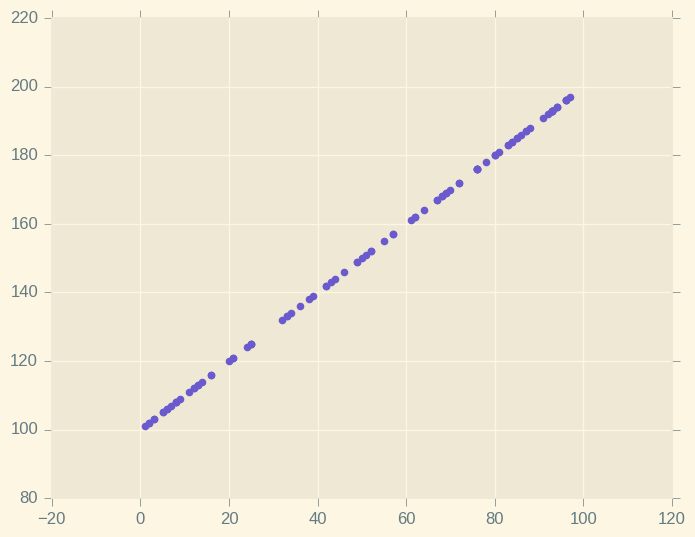

In [49]:
# Set the figure "dots per inch" to be higher than the default (optional, based on your personal preference)
mpl.rcParams['figure.dpi'] = 100

# (Optional) Choose a figure style
print(plt.style.available)
plt.style.use('Solarize_Light2')
plt.scatter(random_line,random_line_2, color = "slateblue")

## Step Two: Get metadata & electrophysiology data

Here, we'll condense the steps from the previous notebook into one cell.

In [50]:
try:
    import allensdk
    print('allensdk imported')
except ImportError as e:
    !pip install allensdk

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

import pandas as pd

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

human_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.HUMAN])).set_index('id')
ephys_features = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
human_ephys_df = human_df.join(ephys_features)
human_ephys_df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 111.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 14.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.7/131.7 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.5/187.5 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 KB 16.3 MB/s eta 0:00:00


,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,...,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,...,5.694547,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,...,14.667340,1.336668,-63.593754,-63.239583,-75.518753,1.452890,1.441754,1.556087,-82.531250,-74.260269


## Step Three: Plot our ephys metrics

Our plotting goal for today is to compare spiny and aspiny cells in humans. We have two options: we could split the dataframe into aspiny and spiny (as you did in our CellTypes notebook), or use our plotting tools to plot the data separately.

Usefully, Pandas has some [built-in plotting tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) to interact with Matplotlib, so we can actually just tell it to plot based on spiny and aspiny.

First, let's plot the **number of cells** that we have for each of the dendrite types. Recall that we can access a column by using the bracket notation, with the column name in parentheses in the bracket.

`value_counts()` is a method that will count up the number of instances of each value.

`plot()` is a Pandas method that will plot, depending on the `kind` argument you give it.

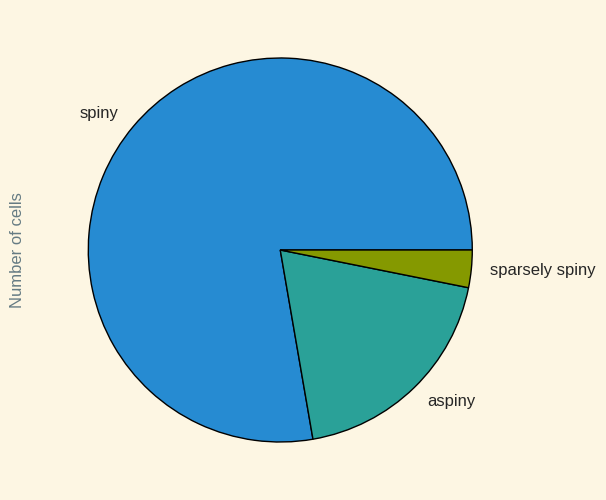

In [74]:
# For the different values in dendrite_type column, get the value_counts, and plot as a bar plot.
human_ephys_df['dendrite_type'].value_counts().plot(kind='pie')

# Add y label
plt.ylabel('Number of cells')

# Show the plot!
plt.show()

><b>Task:</b> Try plotting different features of the dataset (hint: look at the column headers). Try plotting these features using different styles (hint: check out the link in the *Markdown Cell* above to see different <code>kind</code> methods).

Our dataframe contains a *lot* of different metrics on these cells. Let's remind ourselves what we have available by accessing the `columns` attribute.

In [57]:
human_ephys_df.columns

Index(['reporter_status', 'cell_soma_location', 'species', 'name',
       'structure_layer_name', 'structure_area_id', 'structure_area_abbrev',
       'transgenic_line', 'dendrite_type', 'apical', 'reconstruction_type',
       'disease_state', 'donor_id', 'structure_hemisphere', 'normalized_depth',
       'adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_r

Let's choose one of these columns and plot a boxplot. We'll do this with a call to pyplot ([examples here](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)).

**Note**: This is actually *slightly* easier by using the methods of our [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), but it's a little bit more difficult to work with separate objects of the plot afterwards. Knowing how to create plots with a call to `plt.boxplots()` is a more universal way to work with various types of data structures, including dataframes, arrays, lists, etc.

><b>Task:</b> Create a boxplot that compares spiny, aspiny, and sparsely spiny with the following steps:
1. Save three different dataframes from your <code>human_ephys_df</code> by filtering for spiny, aspiny, and sparsely spiny. You can filter dataframes by using the syntax <code>dataframe[dataframe['column_name'] = 'variable_name']</code>
2. Assign the 'fast_trough_v_long_square' of each of your spiny, aspiny, and sparsely spiny dataframes to three different pandas series objects (like a dataframe, but only one dimension). For example, <code>spiny_ft = spiny_data['fast_trough_v_long_square']</code>
3. Create a list of your three different pandas series, and assign it to <code>data</code>. You can accomplish this by using the <code>series.tolist()</code> function.
4. Create a boxplot by using <code>plt.boxplot()</code> and don't forget to show it!
5. Once you're sure the boxplot is working, add a few lines of code to change the xticks, as well as add x and y labels ([see documentation here](https://matplotlib.org/api/axes_api.html#axis-limits)).

([<matplotlib.axis.XTick at 0x7f7cdd0ac400>,
 [Text(1, 0, 'spiny'), Text(2, 0, 'aspiny'), Text(3, 0, 'sparsely_spiny')])

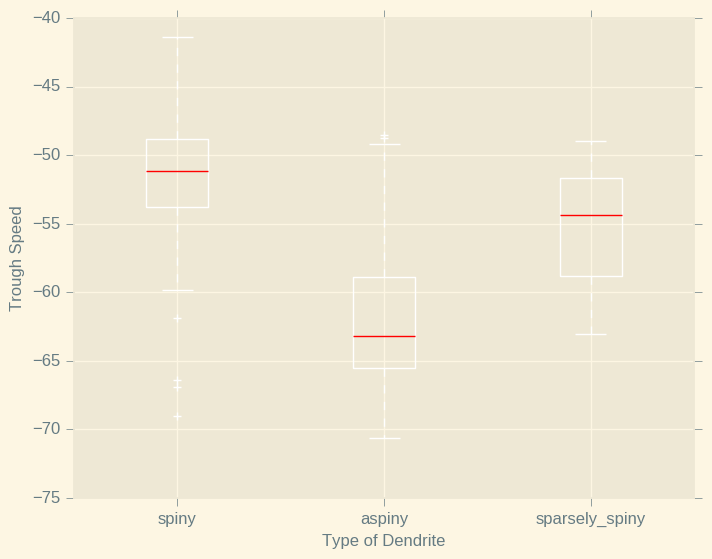

In [91]:
# Your code here!
spiny = human_ephys_df[human_ephys_df['dendrite_type'] == 'spiny']
aspiny = human_ephys_df[human_ephys_df['dendrite_type'] == 'aspiny']
sparsely_spiny = human_ephys_df[human_ephys_df['dendrite_type'] == 'sparsely spiny']
spiny_ft = spiny['fast_trough_v_long_square']
aspiny_ft = aspiny['fast_trough_v_long_square']
sparsely_spiny_ft = sparsely_spiny['fast_trough_v_long_square']
data = [spiny_ft.tolist(), aspiny_ft.tolist(), sparsely_spiny_ft.tolist()]
plt.boxplot(data)
plt.xlabel('Type of Dendrite')
plt.ylabel('Trough Speed')
plt.xticks([1,2,3],['spiny', 'aspiny', 'sparsely_spiny'])



### Plot this data as a scatterplot

The built-in scatterplot methods in Pandas are bit clunky, so we'll use `plt.scatter()` instead ([documentation here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)).

The syntax for a scatter plot is slightly longer if we want to label multiple groups with different colors. We'll actually loop through groups in order to create our plot:

In [ ]:
# Get possible dendrite types
dendrite_types = human_ephys_df['dendrite_type'].unique()

fig = plt.figure()

for d_type in dendrite_types:
    
    df = human_ephys_df[human_ephys_df['dendrite_type'] == d_type]
    
    if d_type == 'spiny':
      plt.scatter(df['fast_trough_v_long_square'], 
                df['upstroke_downstroke_ratio_long_square'],
                label=d_type,color="blue")
    elif d_type == 'aspiny':
      plt.scatter(df['fast_trough_v_long_square'],
                df['upstroke_downstroke_ratio_long_square'],
                label=d_type,color="red")
    else:
      plt.scatter(df['fast_trough_v_long_square'],
                df['upstroke_downstroke_ratio_long_square'],
                label=d_type,color="green")
      
plt.ylabel("upstroke-downstroke ratio")
plt.xlabel("fast trough depth (mV)")
plt.legend(loc='best') 
    
plt.show()